In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def addPixel(a, b):
    gl.glPointSize(1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(a/(WIDTH/2), b/(HEIGHT/2))
    gl.glEnd()


In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(.5,.3,.7)

def midpointCircle(originX, originY, r):
    x = 0
    y = r
    d = 1 - r
    # dE = 2 * x + 3
    # dSe = 2 * (x - y) + 5
    while x <= y:
        if d < 0:  # Choose E
            d += 2 * x + 3

        else:  # Choose SE
            d += 2 * (x - y) + 5
            y -= 1

        x += 1
        eightWay(originX, originY, x, y)

def eightWay(originX, originY, x, y):
    addPixel(originX + x, originY + y)  # zone1
    addPixel(originX + y, originY + x)  # zone0
    addPixel(originX - x, originY + y)  # zone2
    addPixel(originX - y, originY + x)  # zone3
    addPixel(originX - x, originY - y)  # zone5
    addPixel(originX - y, originY - x)  # zone4
    addPixel(originX + x, originY - y)  # zone6
    addPixel(originX + y, originY - x)  # zone7

def Circle(c, r):
    midpointCircle(0, 0, r)                   # outer circle
    angle = 360 / c                           # angle difference between circles
    incangle = 0
    r = r / 2
    for i in range(c):
        x = r * (np.cos(incangle * np.pi / 180))  # circles center x co-ordinate
        y = r * (np.sin(incangle * np.pi / 180))  # circles center y co-ordinate
        midpointCircle(x, y, r)
        incangle += angle    #incrementing same angle for given number of circle
        if incangle > 360:
            break

r = int(input("Enter the radius of the Circle: "))
c = int(input("Enter the number of inside circles: "))
Circle(c, r)


Enter the radius of the Circle: 250
Enter the number of inside circles: 144


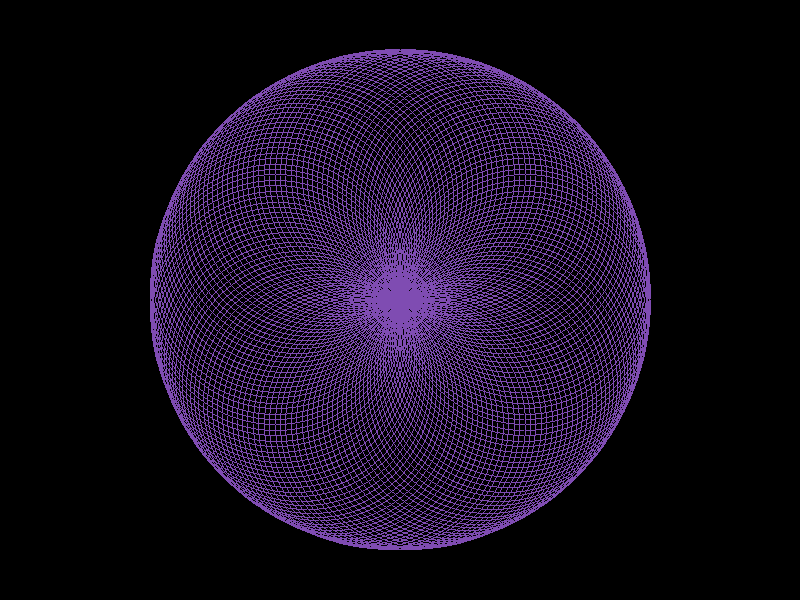

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))